<a href="https://colab.research.google.com/github/VRAraya/Actividad-2-ML/blob/main/Copia_de_SebastianG_Actividad_21_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Ejercicio.
Programe una red MLP con una capa oculta compuesta de 15 neuronas y salida sigmoidal, y además un clasificador bayesiano. Utilice la base datos iris (use sólo 2 clases).

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow.keras as kr
from keras.layers import Dense
from keras.models import Sequential
from scipy.stats import multivariate_normal
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris (return_X_y=True)
x = X[:100]
y = y[:100]

Se obtiene la cantidad de datos (100) y dimensión (4) del X:

In [ ]:
x.shape

(100, 4)

Se construye la red MLP

In [ ]:
red = Sequential()
red.add(Dense(15, input_dim=4, activation='sigmoid'))
red.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compila la red
red.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Train test split desde sklearn
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

# Ajusta la red
red.fit(x, y, epochs=150, batch_size=100)

# Evalua el porcentaje de clasificación en la red
porcentaje_clasificacion = red.evaluate(x, y)

Epoch 1/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.5000
Epoch 3/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.5000
Epoch 4/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.5000
Epoch 5/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.5000
Epoch 6/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.5000
Epoch 7/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.5000
Epoch 8/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.5000
Epoch 9/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.5000
Epoch 10/150
1/1 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.5000
Epoch 11/150
1/1 [===========

In [ ]:
red.predict(x)

array([[0.3704442 ],
       [0.37628326],
       [0.3632968 ],
       [0.37942258],
       [0.367979  ],
       [0.40175107],
       [0.37272495],
       [0.37899268],
       [0.37186575],
       [0.37698027],
       [0.37741336],
       [0.38510105],
       [0.36964166],
       [0.34052658],
       [0.35232982],
       [0.37880877],
       [0.36960846],
       [0.37605414],
       [0.39920872],
       [0.3792185 ],
       [0.3981161 ],
       [0.38661146],
       [0.33334485],
       [0.4152969 ],
       [0.40946436],
       [0.39303485],
       [0.3986844 ],
       [0.3791362 ],
       [0.37292364],
       [0.38706836],
       [0.3895691 ],
       [0.3938162 ],
       [0.36396378],
       [0.36208928],
       [0.3826361 ],
       [0.35879385],
       [0.36611274],
       [0.36155438],
       [0.36260563],
       [0.37988392],
       [0.36726743],
       [0.37885922],
       [0.359783  ],
       [0.4091209 ],
       [0.4179279 ],
       [0.38085404],
       [0.38147798],
       [0.370

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
mu_clase1 = np.mean(x[y==0],axis=0)
mu_clase2 = np.mean(x[y==1],axis=0)
sigma_clase1 = np.cov(x[y==0].T)
sigma_clase2 = np.cov(x[y==1].T)

In [ ]:
sigma_c2.shape

(4, 4)

In [ ]:
w1  = mu_clase1/(sigma_clase1[0,0]) #sigma_c1 es una matriz de 2x2. Solo consideramos el primer elemento, es decir, el elemento
w10 = -(1/(2*sigma_clase1[0,0]))*np.dot(mu_clase1.T,mu_clase1) + np.log(0.5)
w2  = mu_clase2/(sigma_clase2[0,0])
w20 = -(1/(2*sigma_clase2[0,0]))*np.dot(mu_clase2.T,mu_clase2) + np.log(0.5)

diferencia_w  = w1-w2
diferencia_w0 = w10-w20

ValueError: ignored

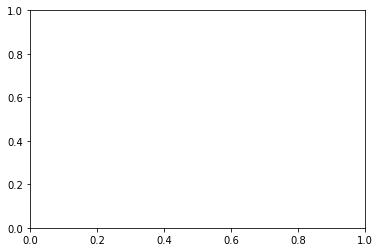

In [ ]:
def x_final(x):
  return (-diferencia_w[0]*x1 - diferencia_w0)/diferencia_w[0]
   

plt.figure()
plt.scatter(x[y==0],  alpha=0.6)
plt.scatter(x[y==1], y, alpha=0.8,marker='x')
plt.plot(x,eq_final(x),color='r',lw=2)
plt.xlabel('x1',fontsize=30)
plt.ylabel('x2',fontsize=30)